# I. Cleaning and data preparation

In [1]:
import pandas as pda
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import itertools
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pda.read_csv("OHC_Python_MMYYYY_FICTIF.csv")

In [3]:
display(data.head())

,anciennete,campement,OFA,tribu,quartier,etabli,activites_tribu,interactions_tribu,tribu_total,activites_QA,...,manages,Es-tu manager/manageuse ?,"Si tu es manager/manageuse, combien de managé.e.s direct(s) as-tu ?",manager,egalite_pro,competences_parcours,sante_conditions_travail,OCTO_total,statut6mois,missions_taches
0,Plus de 7 ans,OCTO Paris,Oui,User Research,Forum,Aucun,4.75,3.75,4.25,4.00,...,4.000000,Non,NaN,NaN,4.25,3.75,4.2,4.050000,En mission chez un/des client(s),5.0
1,Moins de 1 an,OCTO Paris,Oui,User Research,Forum,Aucun,3.75,3.75,3.75,5.00,...,6.000000,Non,NaN,NaN,4.50,3.75,3.6,4.462500,En mission chez un/des client(s),3.0
2,Entre 3 et 7 ans,OCTO Paris,Oui,User Research,Forum,Aucun,5.25,2.75,4.00,5.25,...,4.333333,Non,NaN,NaN,5.25,4.50,3.0,4.270833,En mission chez un/des client(s),4.0
3,Moins de 1 an,OCTO Paris,Oui,User Research,Forum,Aucun,5.00,5.00,5.00,4.00,...,3.000000,Non,NaN,NaN,5.50,2.75,3.6,3.712500,En mission chez un/des client(s),5.0
4,Entre 3 et 7 ans,OCTO Paris,Oui,User Research,Forum,Aucun,2.50,2.00,2.25,3.25,...,5.000000,Non,NaN,NaN,3.50,3.50,3.2,3.800000,En mission chez un/des client(s),2.0


In [4]:
print(data.dtypes)

anciennete                                                              object
campement                                                               object
OFA                                                                     object
tribu                                                                   object
quartier                                                                object
etabli                                                                  object
activites_tribu                                                        float64
interactions_tribu                                                     float64
tribu_total                                                            float64
activites_QA                                                           float64
interactions_QA                                                        float64
QA_total                                                               float64
manages                                             

# II. Description of the sample

## 1. Total sample size

In [5]:
effectif_data = len(data)

print("L'effectif total de l'échantillon est :", effectif_data)

L'effectif total de l'échantillon est : 490


## 2. Numbers and proportion by factor modality (OFA, quartier, tribu, anciennete...)

In [6]:
effectif_par_quartier = data['quartier'].value_counts()

print("Effectif par quartier :\n", effectif_par_quartier)

Effectif par quartier :
 Mairie                          100
Product & Design                 94
Forum                            87
Software engineering             86
Data & IA                        67
Cloud & Platform Engineering     56
Name: quartier, dtype: int64


In [7]:
# Effectifs en pourcentage - ANCIENNETE : 

# 1. Calculer les effectifs
effectifs_par_anciennete = data['anciennete'].value_counts()

# 3. Calculer les pourcentages par modalité
pourcentages_par_anciennete = (effectifs_par_anciennete / effectif_data) * 100

print("Effectifs en % par niveau d'ancienneté :\n", pourcentages_par_anciennete)

Effectifs en % par niveau d'ancienneté :
 Entre 1 et 3 ans    37.959184
Entre 3 et 7 ans    33.265306
Plus de 7 ans       14.489796
Moins de 1 an       14.285714
Name: anciennete, dtype: float64


In [8]:
# Effectifs en pourcentage - OFA: 

effectifs_OFA = data['OFA'].value_counts()

pourcentages_OFA = (effectifs_OFA / effectif_data) * 100

print("Proportion d'Octos appartenant au dispositif OFA :\n", pourcentages_OFA)

Proportion d'Octos appartenant au dispositif OFA :
 Non    86.938776
Oui    13.061224
Name: OFA, dtype: float64


In [9]:
# Effectifs en pourcentage - CAMPEMENT:

effectifs_campement = data ['campement'].value_counts()

pourcentages_campement = (effectifs_campement / effectif_data)*100

print("Proportion d'Octos par campement: \n", pourcentages_campement)

Proportion d'Octos par campement: 
 OCTO Paris    78.163265
Toulouse      13.877551
Chtis          7.959184
Name: campement, dtype: float64


In [10]:
# Effectifs - APPARTENANCE TRIBU : 

nombre_NaN_tribu = data['tribu_total'].isna().sum()
print(nombre_NaN_tribu)

print("Nombre d'Octos sans tribu' :", nombre_NaN_tribu)

0
Nombre d'Octos sans tribu' : 0


# III. Bien-être global en fonction des 4 niveaux d'entités existantes (tribu, Q/A, OCTO, missions)

## A. Descriptive statistics

In [11]:
# Selecting the columns
columns_overallWB = data[['tribu_total', 'QA_total', 'OCTO_total', 'missions_taches', 
                         'manager', 'manages', 'egalite_pro', 
                         'competences_parcours', 'sante_conditions_travail']]

# Calculating the mean across all selected columns
global_mean = columns_overallWB.mean().mean()

# Calculating the standard deviation across all selected columns
global_standard_deviation = columns_overallWB.std().mean()

print("Bien-être moyen global: ", global_mean)
print("Écart type global: ", global_standard_deviation)

Bien-être moyen global:  4.000727164033214
Écart type global:  1.001854840049191


In [12]:
# Calcul des moyennes pour chaque colonne
moyenne_tribu = data['tribu_total'].mean()
moyenne_QA = data['QA_total'].mean()
moyenne_OCTO = data['OCTO_total'].mean()
moyenne_missions = data['missions_taches'].mean()

In [13]:
# Calcul des écart-types pour chaque colonne
ecart_type_tribu = data['tribu_total'].std()
ecart_type_QA = data['QA_total'].std()
ecart_type_OCTO = data['OCTO_total'].std()
ecart_type_missions = data['missions_taches'].std()

In [14]:
# Affichage des résultats
print("Bien-être moyen sur la tribu :", moyenne_tribu)
print("SD tribu :", ecart_type_tribu)
print("Bien-être moyen sur le quartier/atelier :", moyenne_QA)
print("SD QA :", ecart_type_QA)
print("Bien-être moyen sur OCTO :", moyenne_OCTO)
print("SD OCTO :", ecart_type_OCTO)
print("Bien-être moyen sur les missions au quotidien :", moyenne_missions)
print("SD missions :", ecart_type_missions)

Bien-être moyen sur la tribu : 4.023214285714285
SD tribu : 0.776255250353537
Bien-être moyen sur le quartier/atelier : 4.036989795918367
SD QA : 0.7722933273929969
Bien-être moyen sur OCTO : 3.9950425170068025
SD OCTO : 0.49322010857281756
Bien-être moyen sur les missions au quotidien : 4.054572271386431
SD missions : 1.5472268905809312


## B. ANOVA & Post-hoc test

In [15]:
# Ensure data columns are numeric
columns_4levels = ['tribu_total', 'QA_total', 'OCTO_total', 'missions_taches']
data[columns_4levels] = data[columns_4levels].apply(pda.to_numeric, errors='coerce')

In [16]:
# Convertir les données au format long
data_long_4levels = pda.melt(data, value_vars=['tribu_total', 'QA_total', 'OCTO_total', 'missions_taches'], var_name='Level', value_name='Value')

# Supprimer les valeurs manquantes
data_long_4levels = data_long_4levels.dropna()

# Créer le modèle OLS pour l'ANOVA
model_4levels = ols('Value ~ C(Level)', data=data_long_4levels).fit()

# Effectuer l'ANOVA
anova_4levels = sm.stats.anova_lm(model_4levels, typ=2)

# Afficher les résultats
print(anova_4levels)

alpha = 0.05
if (anova_4levels['PR(>F)'] < alpha).any():
    print("Il existe un effet significatif du niveau évalué (p < 0.05).")
else:
    print("Il n'existe pas d'effet significatif du niveau évalué (p > 0.05).")

               sum_sq      df         F   PR(>F)
C(Level)     0.899961     3.0  0.322352  0.80922
Residual  1784.926492  1918.0       NaN      NaN
Il n'existe pas d'effet significatif du niveau évalué (p > 0.05).


In [17]:
# Perform Tukey's test for post-hoc comparisons
tukey_4levels = pairwise_tukeyhsd(endog=data_long_4levels['Value'], groups=data_long_4levels['Level'], alpha=0.05)

# Print Tukey's test results
print(tukey_4levels)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
     OCTO_total        QA_total   0.0419 0.9045 -0.1165 0.2004  False
     OCTO_total missions_taches   0.0595 0.7799 -0.1022 0.2213  False
     OCTO_total     tribu_total   0.0282 0.9683 -0.1303 0.1866  False
       QA_total missions_taches   0.0176 0.9924 -0.1442 0.1794  False
       QA_total     tribu_total  -0.0138 0.9961 -0.1722 0.1447  False
missions_taches     tribu_total  -0.0314 0.9594 -0.1931 0.1304  False
---------------------------------------------------------------------


## C. Graphical representation

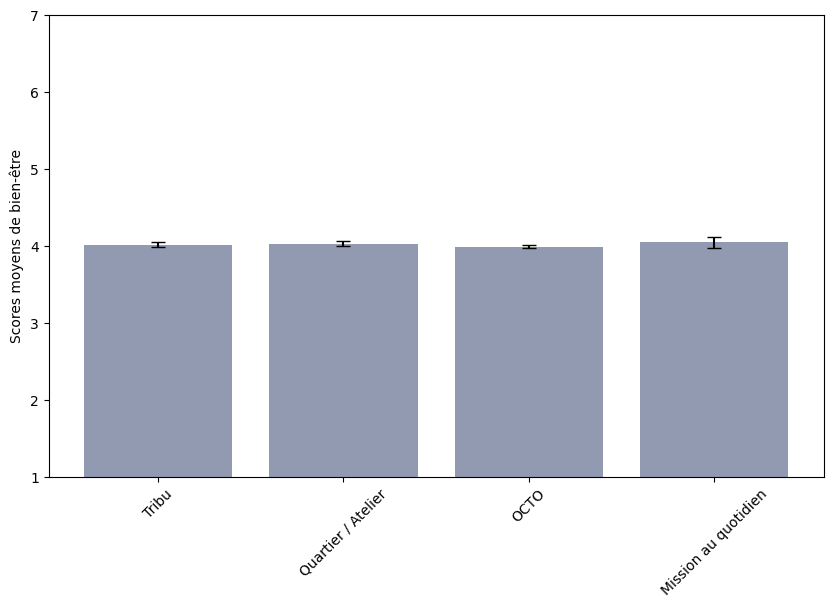

In [18]:
# Noms des groupes pour le graphique
group_names = ['tribu_total', 'QA_total', 'OCTO_total', 'missions_taches']
new_labels = ["Tribu", "Quartier / Atelier", "OCTO", "Mission au quotidien"]

# Calcul des moyennes et des SEM
moyennes = []
sem = []
for name in group_names:
    group_data = data_long_4levels[data_long_4levels['Level'] == name]['Value']
    moyennes.append(group_data.mean())
    sem.append(group_data.sem())  # SEM (Standard Error of the Mean)

# Création du graphique en barres
plt.figure(figsize=(10, 6))
bars = plt.bar(new_labels, moyennes, yerr=sem, capsize=5, color='#627091', alpha=0.7)

# Ajout des étiquettes et du titre
plt.ylabel('Scores moyens de bien-être')
plt.xticks(rotation=45)

# Modifier l'échelle y: 
plt.ylim(1, 7)

# Affichage du graphique
plt.show()

# IV. Focus sur le niveau "OCTO Technology"

## A. Analyses par thématiques (santé_conditions_travail ; managers ; managé.e.s ; égalité pro ; compétences et parcours pro)

### MANOVA

In [19]:
# Convertir les données au format long
data_long_OCTO = pda.melt(data, value_vars=['sante_conditions_travail', 'manager', 'manages', 'egalite_pro', 'competences_parcours'], var_name='Thematiques', value_name='Value')

# Supprimer les valeurs manquantes
data_long_OCTO = data_long_OCTO.dropna()

# Créer le modèle OLS pour l'ANOVA
model_OCTO_theme = ols('Value ~ C(Thematiques)', data=data_long_OCTO).fit()

# Effectuer l'ANOVA
anova_OCTO = sm.stats.anova_lm(model_OCTO_theme, typ=2)

# Afficher les résultats
print(anova_OCTO)

alpha = 0.05
if (anova_OCTO['PR(>F)'] < alpha).any():
    print("Il existe un effet significatif des thématiques (p < 0.05).")
else:
    print("Il n'existe pas d'effet significatif des thématiques (p > 0.05).")

                     sum_sq      df        F    PR(>F)
C(Thematiques)     7.263256     4.0  1.63589  0.162508
Residual        2315.428751  2086.0      NaN       NaN
Il n'existe pas d'effet significatif des thématiques (p > 0.05).


### Post-hoc tests

In [20]:
# Perform Tukey's test for post-hoc comparisons
tukey_OCTO = pairwise_tukeyhsd(endog=data_long_OCTO['Value'], groups=data_long_OCTO['Thematiques'], alpha=0.05)

# Print Tukey's test results
print(tukey_OCTO)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1                 group2          meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------------
competences_parcours              egalite_pro   0.0842 0.7214 -0.0996 0.2679  False
competences_parcours                  manager  -0.1267 0.7381 -0.4096 0.1562  False
competences_parcours                  manages  -0.0575 0.9134 -0.2412 0.1263  False
competences_parcours sante_conditions_travail    0.012 0.9998 -0.1717 0.1958  False
         egalite_pro                  manager  -0.2109 0.2495 -0.4938  0.072  False
         egalite_pro                  manages  -0.1417 0.2183 -0.3254 0.0421  False
         egalite_pro sante_conditions_travail  -0.0721 0.8211 -0.2559 0.1116  False
             manager                  manages   0.0692 0.9632 -0.2137 0.3521  False
             manager sante_conditions_travail   0.1388 0.6668 -0.1442 0.4217

### Stat Descriptives

In [21]:
moyenne_sante_conditions = data['sante_conditions_travail'].mean()
sd_sante_conditions = data['sante_conditions_travail'].std()
print("Moyenne Santé et conditions de travail:", moyenne_sante_conditions)
print("SD: ", sd_sante_conditions)

moyenne_competences_parcours = data['competences_parcours'].mean()
sd_competences_parcours = data['competences_parcours'].std()
print("Moyenne competences et parcours:", moyenne_competences_parcours)
print("SD: ", sd_competences_parcours)

moyenne_egalite_pro = data['egalite_pro'].mean()
sd_egalite_pro = data['egalite_pro'].std()
print("Moyenne égalité professionnelle:", moyenne_egalite_pro)
print("SD: ", sd_egalite_pro)

moyenne_manages = data['manages'].mean()
sd_manages = data['manages'].std()
print("Moyenne des managé.e.s:", moyenne_manages)
print("SD: ", sd_manages)

effectif_manager = data['manager'].count()
moyenne_manager = data['manager'].mean()
sd_manager = data['manager'].std()
print("Moyenne des managers:", moyenne_manager)
print("SD: ", sd_manager)
print("Effectif managers:", effectif_manager)

Moyenne Santé et conditions de travail: 4.008979591836735
SD:  0.8202454740012071
Moyenne competences et parcours: 3.996938775510204
SD:  1.008395644271137
Moyenne égalité professionnelle: 4.081122448979592
SD:  0.9474569154597356
Moyenne des managé.e.s: 3.9394557823129253
SD:  1.2849817398601617
Moyenne des managers: 3.8702290076335877
SD:  1.3666182099501951
Effectif managers: 131


## B. Analyses par facteurs : level "OCTO" X (anciennete+OFA+quartier)

### MANOVA

In [22]:
# Création du modèle ANOVA (score global sur OCTO X OFA X anciennete X quartier)
model_OCTO_factors = ols('OCTO_total ~ C(anciennete) + C(OFA) + C(quartier)', data=data).fit()

# Tableau d'analyse de variance (ANOVA)
anova_table_OCTO_total = sm.stats.anova_lm(model_OCTO_factors, typ=2)
print(anova_table_OCTO_total)

# Interprétation de l'effet principal de l'ancienneté
if anova_table_OCTO_total['PR(>F)']['C(anciennete)'] < 0.05:
    print("Il y a une différence statistiquement significative des moyennes entre les niveaux d'ancienneté.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux d'ancienneté.")

# Interprétation de l'effet principal de OFA
if anova_table_OCTO_total['PR(>F)']['C(OFA)'] < 0.05:
    print("Il y a une différence statistiquement significative des moyennes entre les niveaux de OFA.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux de OFA.")

# Interprétation de l'effet principal du quartier
if anova_table_OCTO_total['PR(>F)']['C(quartier)'] < 0.05:
    print("Il y a une différence statistiquement significative des moyennes entre les niveaux du quartier.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux du quartier.")

                   sum_sq     df          F    PR(>F)
C(anciennete)    2.506005    3.0   3.636146  0.012873
C(OFA)           2.516719    1.0  10.955073  0.001004
C(quartier)      2.749951    5.0   2.394063  0.036753
Residual       110.270823  480.0        NaN       NaN
Il y a une différence statistiquement significative des moyennes entre les niveaux d'ancienneté.
Il y a une différence statistiquement significative des moyennes entre les niveaux de OFA.
Il y a une différence statistiquement significative des moyennes entre les niveaux du quartier.


### Post-hoc tests & statistiques descriptives - ANCIENNETE

In [23]:
# Perform Tukey's HSD test
ttest_anciennete_OCTO = pairwise_tukeyhsd(endog=data['OCTO_total'], groups=data['anciennete'], alpha=0.05)

# Print the results
print(ttest_anciennete_OCTO)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
Entre 1 et 3 ans Entre 3 et 7 ans   0.1066 0.1764 -0.0284  0.2417  False
Entre 1 et 3 ans    Moins de 1 an   0.2243 0.0062  0.0478  0.4008   True
Entre 1 et 3 ans    Plus de 7 ans   0.0029    1.0 -0.1727  0.1785  False
Entre 3 et 7 ans    Moins de 1 an   0.1177 0.3318 -0.0622  0.2975  False
Entre 3 et 7 ans    Plus de 7 ans  -0.1037 0.4418 -0.2827  0.0752  False
   Moins de 1 an    Plus de 7 ans  -0.2214 0.0368 -0.4334 -0.0094   True
------------------------------------------------------------------------


In [24]:
# Grouping the data by the factor and calculating the mean for each group
means_anciennete = data.groupby('anciennete')['OCTO_total'].mean()
sd_anciennete = data.groupby('anciennete')['OCTO_total'].std()

# Display the results
print(means_anciennete)
print(sd_anciennete)

anciennete
Entre 1 et 3 ans    3.927106
Entre 3 et 7 ans    4.033737
Moins de 1 an       4.151417
Plus de 7 ans       3.930012
Name: OCTO_total, dtype: float64
anciennete
Entre 1 et 3 ans    0.483785
Entre 3 et 7 ans    0.494306
Moins de 1 an       0.512098
Plus de 7 ans       0.460839
Name: OCTO_total, dtype: float64


### Post-hoc tests & descriptive statistics for QUARTIER

In [25]:
# Perform Tukey's HSD test
ttest_QA_OCTO = pairwise_tukeyhsd(endog=data['OCTO_total'], groups=data['quartier'], alpha=0.05)

# Print the results
print(ttest_QA_OCTO)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
           group1                   group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------
Cloud & Platform Engineering            Data & IA   0.2572 0.0449  0.0034 0.5109   True
Cloud & Platform Engineering                Forum   0.2199 0.0944 -0.0202   0.46  False
Cloud & Platform Engineering               Mairie    0.253 0.0252  0.0191  0.487   True
Cloud & Platform Engineering     Product & Design   0.2143 0.1011 -0.0222 0.4509  False
Cloud & Platform Engineering Software engineering   0.2289 0.0728 -0.0117 0.4696  False
                   Data & IA                Forum  -0.0373 0.9972 -0.2651 0.1905  False
                   Data & IA               Mairie  -0.0041    1.0 -0.2254 0.2171  False
                   Data & IA     Product & Design  -0.0428 0.9942 -0.2669 0.1812  False
                   Data & IA Sof

In [26]:
# Grouping the data by the factor and calculating the mean for each group
means_QA = data.groupby('quartier')['OCTO_total'].mean()
sd_QA = data.groupby('quartier')['OCTO_total'].std()

# Display the results
print(means_QA)
print(sd_QA)

quartier
Cloud & Platform Engineering    3.787902
Data & IA                       4.045062
Forum                           4.007768
Mairie                          4.040950
Product & Design                4.002234
Software engineering            4.016841
Name: OCTO_total, dtype: float64
quartier
Cloud & Platform Engineering    0.418606
Data & IA                       0.457054
Forum                           0.432712
Mairie                          0.565528
Product & Design                0.548602
Software engineering            0.446379
Name: OCTO_total, dtype: float64


### Post-hoc tests & descriptive statistics for OFA

In [27]:
# Perform Tukey's HSD test
ttest_OFA_OCTO = pairwise_tukeyhsd(endog=data['OCTO_total'], groups=data['OFA'], alpha=0.05)

# Print the results
print(ttest_OFA_OCTO)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   Non    Oui   0.2564 0.0001 0.1284 0.3844   True
--------------------------------------------------


In [28]:
# Grouping the data by the factor and calculating the mean for each group
means_OFA_OCTO = data.groupby('OFA')['OCTO_total'].mean()
sd_OFA_OCTO = data.groupby('OFA')['OCTO_total'].std()

# Display the results
print(means_OFA_OCTO)
print(sd_OFA_OCTO)

OFA
Non    3.961553
Oui    4.217956
Name: OCTO_total, dtype: float64
OFA
Non    0.492642
Oui    0.439218
Name: OCTO_total, dtype: float64


# V. Focus sur le niveau "Management"

## A. Analyses par thématiques (managers + managé.e.s)

### T-test et statistiques descriptives

In [29]:
# Convertir les données au format long
data_long_management = pda.melt(data, value_vars=['manages', 'manager'], var_name='Thematiques', value_name='Value')

# Supprimer les valeurs manquantes
data_long_management = data_long_management.dropna()

# Perform the t-test
ttest_management = pairwise_tukeyhsd(endog=data_long_management['Value'], groups=data_long_management['Thematiques'], alpha=0.05)

# Print the results
print(ttest_management)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
manager manages   0.0692 0.5892 -0.1824 0.3208  False
-----------------------------------------------------


In [30]:
mean_manager = data['manager'].mean()
mean_manages = data['manages'].mean()
std_manager = data['manager'].std()
std_manages = data['manages'].std()

print("Bien-être moyen des Octos concernant leur management en tant que managers est de:", mean_manager)
print("Ecart-type de:", std_manager)

print("Bien-être moyen des Octos concernant leur management en tant que managé.e.s est de :", mean_manages)
print("Ecart-type de :", std_manages)

Bien-être moyen des Octos concernant leur management en tant que managers est de: 3.8702290076335877
Ecart-type de: 1.3666182099501951
Bien-être moyen des Octos concernant leur management en tant que managé.e.s est de : 3.9394557823129253
Ecart-type de : 1.2849817398601617


## B. Analyses par facteur (anciennete ; OFA ; quartier/atelier) sur le niveau des "managé.e.s"

### ANOVA

In [31]:
# Création du modèle ANOVA
model_management_manages = ols('manages ~ C(anciennete) + C(OFA) + C(quartier)', data=data).fit()

# Tableau d'analyse de variance (ANOVA)
anova_table_manages = sm.stats.anova_lm(model_management_manages, typ=2)
print(anova_table_manages)

# Interprétation de l'effet principal de l'ancienneté
if anova_table_manages['PR(>F)']['C(anciennete)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux d'ancienneté.")
else:
    print("Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.")

# Interprétation de l'effet principal de OFA
if anova_table_manages['PR(>F)']['C(OFA)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux de OFA.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux de OFA.")

# Interprétation de l'effet principal du quartier
if anova_table_manages['PR(>F)']['C(quartier)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux du quartier.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux du quartier.")

                   sum_sq     df          F        PR(>F)
C(anciennete)   10.897325    3.0   2.565058  5.401806e-02
C(OFA)          74.167325    1.0  52.373454  1.831089e-12
C(quartier)     29.586561    5.0   4.178526  1.000297e-03
Residual       679.739705  480.0        NaN           NaN
Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.
Il y a une différence significative des moyennes entre les niveaux de OFA.
Il y a une différence significative des moyennes entre les niveaux du quartier.


### Post-hoc tests & descriptive statistics for Anciennete

In [32]:
# Perform Tukey's HSD test
ttest_anciennete_manages = pairwise_tukeyhsd(endog=data['manages'], groups=data['anciennete'], alpha=0.05)

# Print the results
print(ttest_anciennete_manages)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
Entre 1 et 3 ans Entre 3 et 7 ans   0.1681 0.6071 -0.1838   0.52  False
Entre 1 et 3 ans    Moins de 1 an   0.5866 0.0059  0.1268 1.0465   True
Entre 1 et 3 ans    Plus de 7 ans   0.3989 0.1121 -0.0586 0.8564  False
Entre 3 et 7 ans    Moins de 1 an   0.4186 0.0989 -0.0501 0.8872  False
Entre 3 et 7 ans    Plus de 7 ans   0.2308 0.5787 -0.2355 0.6972  False
   Moins de 1 an    Plus de 7 ans  -0.1877 0.8173 -0.7401 0.3647  False
-----------------------------------------------------------------------


In [33]:
# Grouping the data by the factor and calculating the mean for each group
means_anciennete_manages = data.groupby('anciennete')['manages'].mean()
sd_anciennete_manages = data.groupby('anciennete')['manages'].std()

# Display the results
print(means_anciennete_manages)
print(sd_anciennete_manages)

anciennete
Entre 1 et 3 ans    3.741935
Entre 3 et 7 ans    3.910020
Moins de 1 an       4.328571
Plus de 7 ans       4.140845
Name: manages, dtype: float64
anciennete
Entre 1 et 3 ans    1.174943
Entre 3 et 7 ans    1.302662
Moins de 1 an       1.415912
Plus de 7 ans       1.297937
Name: manages, dtype: float64


### Post-hoc tests & descriptive statistics for OFA

In [34]:
# Perform Tukey's HSD test
ttest_OFA_manages = pairwise_tukeyhsd(endog=data['manages'], groups=data['OFA'], alpha=0.05)

# Print the results
print(ttest_OFA_manages)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   Non    Oui   1.2618   0.0 0.9421 1.5815   True
-------------------------------------------------


In [35]:
# Grouping the data by the factor and calculating the mean for each group
means_OFA_manages = data.groupby('OFA')['manages'].mean()
sd_OFA_manages = data.groupby('OFA')['manages'].std()

# Display the results
print(means_OFA_manages)
print(sd_OFA_manages)

OFA
Non    3.774648
Oui    5.036458
Name: manages, dtype: float64
OFA
Non    1.210120
Oui    1.237448
Name: manages, dtype: float64


### Post-hoc tests & descriptive statistics for Quartier

In [36]:
# Perform Tukey's HSD test
ttest_quartier_manages = pairwise_tukeyhsd(endog=data['manages'], groups=data['quartier'], alpha=0.05)

# Print the results
print(ttest_quartier_manages)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
           group1                   group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------
Cloud & Platform Engineering            Data & IA   0.6973 0.0299   0.041 1.3537   True
Cloud & Platform Engineering                Forum   0.6862 0.0206  0.0651 1.3072   True
Cloud & Platform Engineering               Mairie   0.8721 0.0006  0.2671 1.4772   True
Cloud & Platform Engineering     Product & Design   0.7534 0.0062  0.1415 1.3653   True
Cloud & Platform Engineering Software engineering   0.7515 0.0079  0.1291  1.374   True
                   Data & IA                Forum  -0.0112    1.0 -0.6004 0.5781  False
                   Data & IA               Mairie   0.1748 0.9526 -0.3975 0.7471  False
                   Data & IA     Product & Design   0.0561 0.9998 -0.5235 0.6357  False
                   Data & IA Sof

In [37]:
# Grouping the data by the factor and calculating the mean for each group
means_quartier_manages = data.groupby('quartier')['manages'].mean()
sd_quartier_manages = data.groupby('quartier')['manages'].std()

# Display the results
print(means_quartier_manages)
print(sd_quartier_manages)

quartier
Cloud & Platform Engineering    3.267857
Data & IA                       3.965174
Forum                           3.954023
Mairie                          4.140000
Product & Design                4.021277
Software engineering            4.019380
Name: manages, dtype: float64
quartier
Cloud & Platform Engineering    0.863209
Data & IA                       1.220110
Forum                           1.169346
Mairie                          1.463495
Product & Design                1.429179
Software engineering            1.178627
Name: manages, dtype: float64


## C. Analyses par facteur (anciennete ; OFA ; quartier/atelier) sur le niveau des "managers"

### ANOVA

In [38]:
# Création d'un nouveau DataFrame en supprimant les lignes avec des données manquantes dans la colonne 'manager'
data_cleaned_managers = data.dropna(subset=['manager'])

# Création du modèle ANOVA
model_management_manager = ols('manager ~ C(anciennete) + C(OFA) + C(quartier)', data=data_cleaned_managers).fit()

# Tableau d'analyse de variance (ANOVA)
anova_table_manager = sm.stats.anova_lm(model_management_manager, typ=2)
print(anova_table_manager)

# Interprétation de l'effet principal de l'ancienneté
if anova_table_manager['PR(>F)']['C(anciennete)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux d'ancienneté.")
else:
    print("Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.")

# Interprétation de l'effet principal de OFA
if anova_table_manager['PR(>F)']['C(OFA)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux de OFA.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux de OFA.")

# Interprétation de l'effet principal du quartier
if anova_table_manager['PR(>F)']['C(quartier)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux du quartier.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux du quartier.")

                   sum_sq     df          F        PR(>F)
C(anciennete)   30.643031    3.0   9.178321  1.613177e-05
C(OFA)          54.103340    1.0  48.615737  1.771817e-10
C(quartier)     11.748370    5.0   2.111351  6.857358e-02
Residual       134.658128  121.0        NaN           NaN
Il y a une différence significative des moyennes entre les niveaux d'ancienneté.
Il y a une différence significative des moyennes entre les niveaux de OFA.
Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux du quartier.


### Post-hoc tests & descriptive statistics for Anciennete

In [39]:
# Perform Tukey's HSD test
ttest_anciennete_manager = pairwise_tukeyhsd(endog=data_cleaned_managers['manager'], groups=data_cleaned_managers['anciennete'], alpha=0.05)

# Print the results
print(ttest_anciennete_manager)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
Entre 1 et 3 ans Entre 3 et 7 ans   0.9545 0.0009  0.3156 1.5935   True
Entre 1 et 3 ans    Moins de 1 an      1.7 0.0003  0.6488 2.7512   True
Entre 1 et 3 ans    Plus de 7 ans   0.1286 0.9866 -0.8602 1.1173  False
Entre 3 et 7 ans    Moins de 1 an   0.7455 0.2494 -0.2964 1.7873  False
Entre 3 et 7 ans    Plus de 7 ans   -0.826 0.1297 -1.8048 0.1529  False
   Moins de 1 an    Plus de 7 ans  -1.5714 0.0099 -2.8578 -0.285   True
-----------------------------------------------------------------------


In [40]:
# Grouping the data by the factor and calculating the mean for each group
means_anciennete_managers = data_cleaned_managers.groupby('anciennete')['manager'].mean()
sd_anciennete_managers = data_cleaned_managers.groupby('anciennete')['manager'].std()

# Display the results
print(means_anciennete_managers)
print(sd_anciennete_managers)

anciennete
Entre 1 et 3 ans    3.300000
Entre 3 et 7 ans    4.254545
Moins de 1 an       5.000000
Plus de 7 ans       3.428571
Name: manager, dtype: float64
anciennete
Entre 1 et 3 ans    0.909137
Entre 3 et 7 ans    1.493420
Moins de 1 an       1.477098
Plus de 7 ans       1.089410
Name: manager, dtype: float64


### Post-hoc tests & descriptive statistics for OFA

In [41]:
# Perform Tukey's HSD test
ttest_quartier_manager = pairwise_tukeyhsd(endog=data_cleaned_managers['manager'], groups=data_cleaned_managers['quartier'], alpha=0.05)

# Print the results
print(ttest_quartier_manager)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
           group1                   group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------
Cloud & Platform Engineering            Data & IA      1.0 0.3355 -0.4309 2.4309  False
Cloud & Platform Engineering                Forum    1.125 0.1624 -0.2288 2.4788  False
Cloud & Platform Engineering               Mairie      1.0 0.2541 -0.3272 2.3272  False
Cloud & Platform Engineering     Product & Design     0.84  0.464 -0.5043 2.1843  False
Cloud & Platform Engineering Software engineering    0.875  0.425 -0.4788 2.2288  False
                   Data & IA                Forum    0.125 0.9997 -1.1008 1.3508  False
                   Data & IA               Mairie      0.0    1.0 -1.1963 1.1963  False
                   Data & IA     Product & Design    -0.16 0.9989 -1.3753 1.0553  False
                   Data & IA Sof

In [42]:
# Grouping the data by the factor and calculating the mean for each group
means_OFA_managers = data_cleaned_managers.groupby('OFA')['manager'].mean()
sd_OFA_managers = data_cleaned_managers.groupby('OFA')['manager'].std()

# Display the results
print(means_OFA_managers)
print(sd_OFA_managers)

OFA
Non    3.635593
Oui    6.000000
Name: manager, dtype: float64
OFA
Non    1.231115
Oui    0.000000
Name: manager, dtype: float64


### Post-hoc tests & descriptive statistics for Quartier

In [43]:
# Perform Tukey's HSD test
ttest_quartier_manager = pairwise_tukeyhsd(endog=data_cleaned_managers['manager'], groups=data_cleaned_managers['quartier'], alpha=0.05)

# Print the results
print(ttest_quartier_manager)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
           group1                   group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------
Cloud & Platform Engineering            Data & IA      1.0 0.3355 -0.4309 2.4309  False
Cloud & Platform Engineering                Forum    1.125 0.1624 -0.2288 2.4788  False
Cloud & Platform Engineering               Mairie      1.0 0.2541 -0.3272 2.3272  False
Cloud & Platform Engineering     Product & Design     0.84  0.464 -0.5043 2.1843  False
Cloud & Platform Engineering Software engineering    0.875  0.425 -0.4788 2.2288  False
                   Data & IA                Forum    0.125 0.9997 -1.1008 1.3508  False
                   Data & IA               Mairie      0.0    1.0 -1.1963 1.1963  False
                   Data & IA     Product & Design    -0.16 0.9989 -1.3753 1.0553  False
                   Data & IA Sof

In [44]:
# Grouping the data by the factor and calculating the mean for each group
means_quartier_managers = data_cleaned_managers.groupby('quartier')['manager'].mean()
sd_quartier_managers = data_cleaned_managers.groupby('quartier')['manager'].std()

# Display the results
print(means_quartier_managers)
print(sd_quartier_managers)

quartier
Cloud & Platform Engineering    3.000
Data & IA                       4.000
Forum                           4.125
Mairie                          4.000
Product & Design                3.840
Software engineering            3.875
Name: manager, dtype: float64
quartier
Cloud & Platform Engineering    0.000000
Data & IA                       1.455214
Forum                           1.483606
Mairie                          1.441153
Product & Design                1.374773
Software engineering            1.392917
Name: manager, dtype: float64


# VI. Focus sur le niveau "Santé et conditions de travail"

## A. Analyses par facteur (ancienneté, OFA, quartier) sur les scores de "santé et conditions de travail"

### T-test et statistiques descriptives

In [45]:
#Rappel: 

moyenne_sante_conditions = data['sante_conditions_travail'].mean()
sd_sante_conditions = data['sante_conditions_travail'].std()
print("Moyenne Santé et conditions de travail:", moyenne_sante_conditions)
print("SD: ", sd_sante_conditions)

Moyenne Santé et conditions de travail: 4.008979591836735
SD:  0.8202454740012071


In [46]:
# Création du modèle ANOVA
model_sante_conditions = ols('sante_conditions_travail ~ C(anciennete) + C(OFA) + C(quartier)', data=data).fit()

# Tableau d'analyse de variance (ANOVA)
anova_table_sante_conditions = sm.stats.anova_lm(model_sante_conditions, typ=2)
print(anova_table_sante_conditions)

# Interprétation de l'effet principal de l'ancienneté
if anova_table_sante_conditions['PR(>F)']['C(anciennete)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux d'ancienneté.")
else:
    print("Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.")

# Interprétation de l'effet principal de OFA
if anova_table_manages['PR(>F)']['C(OFA)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux de OFA.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux de OFA.")

# Interprétation de l'effet principal du quartier
if anova_table_manages['PR(>F)']['C(quartier)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux du quartier.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux du quartier.")

                   sum_sq     df          F        PR(>F)
C(anciennete)    1.654579    3.0   0.856044  4.638443e-01
C(OFA)          17.551814    1.0  27.242827  2.676169e-07
C(quartier)      1.403574    5.0   0.435708  8.236631e-01
Residual       309.250975  480.0        NaN           NaN
Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.
Il y a une différence significative des moyennes entre les niveaux de OFA.
Il y a une différence significative des moyennes entre les niveaux du quartier.


### Post-hoc et statistiques descriptive - Anciennete

In [47]:
# Perform Tukey's HSD test
ttest_anciennete_sante_conditions = pairwise_tukeyhsd(endog=data['sante_conditions_travail'], groups=data['anciennete'], alpha=0.05)

# Print the results
print(ttest_anciennete_sante_conditions)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
Entre 1 et 3 ans Entre 3 et 7 ans   0.0036    1.0 -0.2233 0.2306  False
Entre 1 et 3 ans    Moins de 1 an  -0.0116 0.9996 -0.3082  0.285  False
Entre 1 et 3 ans    Plus de 7 ans  -0.1724 0.4344 -0.4675 0.1226  False
Entre 3 et 7 ans    Moins de 1 an  -0.0152 0.9992 -0.3174 0.2871  False
Entre 3 et 7 ans    Plus de 7 ans  -0.1761 0.4328 -0.4768 0.1247  False
   Moins de 1 an    Plus de 7 ans  -0.1609 0.6498 -0.5172 0.1954  False
-----------------------------------------------------------------------


In [48]:
# Grouping the data by the factor and calculating the mean for each group
means_anciennete_sante_conditions = data.groupby('anciennete')['sante_conditions_travail'].mean()
sd_anciennete_sante_conditions = data.groupby('anciennete')['sante_conditions_travail'].std()

# Display the results
print(means_anciennete_sante_conditions)
print(sd_anciennete_sante_conditions)

anciennete
Entre 1 et 3 ans    4.034409
Entre 3 et 7 ans    4.038037
Moins de 1 an       4.022857
Plus de 7 ans       3.861972
Name: sante_conditions_travail, dtype: float64
anciennete
Entre 1 et 3 ans    0.815591
Entre 3 et 7 ans    0.804172
Moins de 1 an       0.769372
Plus de 7 ans       0.914388
Name: sante_conditions_travail, dtype: float64


### Post-hoc et statistiques descriptives - OFA

In [49]:
# Perform Tukey's HSD test
ttest_OFA_sante_conditions = pairwise_tukeyhsd(endog=data['sante_conditions_travail'], groups=data['OFA'], alpha=0.05)

# Print the results
print(ttest_OFA_sante_conditions)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   Non    Oui  -0.5459   0.0 -0.7567 -0.3351   True
---------------------------------------------------


In [50]:
# Grouping the data by the factor and calculating the mean for each group
means_OFA_sante_conditions = data.groupby('OFA')['sante_conditions_travail'].mean()
sd_OFA_sante_conditions = data.groupby('OFA')['sante_conditions_travail'].std()

# Display the results
print(means_OFA_sante_conditions)
print(sd_OFA_sante_conditions)

OFA
Non    4.080282
Oui    3.534375
Name: sante_conditions_travail, dtype: float64
OFA
Non    0.818858
Oui    0.660019
Name: sante_conditions_travail, dtype: float64


### Post-hoc et statistiques descriptives - Quartiers/ateliers

In [51]:
# Perform Tukey's HSD test
ttest_QA_sante_conditions = pairwise_tukeyhsd(endog=data['sante_conditions_travail'], groups=data['quartier'], alpha=0.05)

# Print the results
print(ttest_QA_sante_conditions)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
           group1                   group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------
Cloud & Platform Engineering            Data & IA   0.0699 0.9972 -0.3569 0.4967  False
Cloud & Platform Engineering                Forum  -0.0245    1.0 -0.4284 0.3794  False
Cloud & Platform Engineering               Mairie  -0.0187    1.0 -0.4122 0.3747  False
Cloud & Platform Engineering     Product & Design  -0.0022    1.0 -0.4001 0.3957  False
Cloud & Platform Engineering Software engineering  -0.0154    1.0 -0.4202 0.3894  False
                   Data & IA                Forum  -0.0944 0.9813 -0.4776 0.2888  False
                   Data & IA               Mairie  -0.0886  0.984 -0.4608 0.2836  False
                   Data & IA     Product & Design  -0.0721 0.9941  -0.449 0.3048  False
                   Data & IA Sof

In [52]:
# Grouping the data by the factor and calculating the mean for each group
means_QA_sante_conditions = data.groupby('quartier')['sante_conditions_travail'].mean()
sd_QA_sante_conditions = data.groupby('quartier')['sante_conditions_travail'].std()

# Display the results
print(means_QA_sante_conditions)
print(sd_QA_sante_conditions)

quartier
Cloud & Platform Engineering    4.010714
Data & IA                       4.080597
Forum                           3.986207
Mairie                          3.992000
Product & Design                4.008511
Software engineering            3.995349
Name: sante_conditions_travail, dtype: float64
quartier
Cloud & Platform Engineering    0.822784
Data & IA                       0.793198
Forum                           0.860391
Mairie                          0.835534
Product & Design                0.795101
Software engineering            0.827741
Name: sante_conditions_travail, dtype: float64


# VII. Focus sur le niveau "Compétences et parcours professionnel"

## A. Analyses par facteur (ancienneté, OFA, quartier) sur les scores de "compétences et parcours professionnel"

### MANOVA

In [53]:
# Rappel: 
moyenne_competences_parcours = data['competences_parcours'].mean()
sd_competences_parcours = data['competences_parcours'].std()
print("Moyenne competences et parcours:", moyenne_competences_parcours)
print("SD: ", sd_competences_parcours)

Moyenne competences et parcours: 3.996938775510204
SD:  1.008395644271137


In [54]:
# Création du modèle ANOVA
model_parcourspro = ols('competences_parcours ~ C(anciennete) + C(OFA) + C(quartier)', data=data).fit()

# Tableau d'analyse de variance (ANOVA)
anova_table_parcourspro = sm.stats.anova_lm(model_parcourspro, typ=2)
print(anova_table_parcourspro)

# Interprétation de l'effet principal de l'ancienneté
if anova_table_parcourspro['PR(>F)']['C(anciennete)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux d'ancienneté.")
else:
    print("Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.")

# Interprétation de l'effet principal de OFA
if anova_table_manages['PR(>F)']['C(OFA)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux de OFA.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux de OFA.")

# Interprétation de l'effet principal du quartier
if anova_table_manages['PR(>F)']['C(quartier)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux du quartier.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux du quartier.")

                   sum_sq     df         F    PR(>F)
C(anciennete)    3.370701    3.0  1.104725  0.346778
C(OFA)           4.420698    1.0  4.346563  0.037612
C(quartier)      1.425892    5.0  0.280396  0.923842
Residual       488.186883  480.0       NaN       NaN
Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.
Il y a une différence significative des moyennes entre les niveaux de OFA.
Il y a une différence significative des moyennes entre les niveaux du quartier.


### Post-hoc et statistiques descriptives - Anciennete

In [55]:
# Perform Tukey's HSD test
ttest_anciennete_parcourspro = pairwise_tukeyhsd(endog=data['competences_parcours'], groups=data['anciennete'], alpha=0.05)

# Print the results
print(ttest_anciennete_parcourspro)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
Entre 1 et 3 ans Entre 3 et 7 ans   0.0617 0.9407  -0.217 0.3404  False
Entre 1 et 3 ans    Moins de 1 an  -0.0456 0.9884 -0.4098 0.3187  False
Entre 1 et 3 ans    Plus de 7 ans  -0.2106 0.4392  -0.573 0.1518  False
Entre 3 et 7 ans    Moins de 1 an  -0.1073 0.8787 -0.4785 0.2639  False
Entre 3 et 7 ans    Plus de 7 ans  -0.2723 0.2291 -0.6417  0.097  False
   Moins de 1 an    Plus de 7 ans   -0.165 0.7652 -0.6026 0.2725  False
-----------------------------------------------------------------------


In [56]:
# Grouping the data by the factor and calculating the mean for each group
means_anciennete_competencepro = data.groupby('anciennete')['competences_parcours'].mean()
sd_anciennete_competencepro = data.groupby('anciennete')['competences_parcours'].std()

# Display the results
print(means_anciennete_competencepro)
print(sd_anciennete_competencepro)

anciennete
Entre 1 et 3 ans    4.013441
Entre 3 et 7 ans    4.075153
Moins de 1 an       3.967857
Plus de 7 ans       3.802817
Name: competences_parcours, dtype: float64
anciennete
Entre 1 et 3 ans    1.011331
Entre 3 et 7 ans    0.979392
Moins de 1 an       0.978872
Plus de 7 ans       1.087195
Name: competences_parcours, dtype: float64


### Post-hoc et statistiques descriptives - OFA

In [57]:
# Perform Tukey's HSD test
ttest_OFA_parcourspro = pairwise_tukeyhsd(endog=data['competences_parcours'], groups=data['OFA'], alpha=0.05)

# Print the results
print(ttest_OFA_parcourspro)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Non    Oui  -0.2706 0.0452 -0.5354 -0.0058   True
----------------------------------------------------


In [58]:
# Grouping the data by the factor and calculating the mean for each group
means_OFA_competencepro = data.groupby('OFA')['competences_parcours'].mean()
sd_OFA_competencepro = data.groupby('OFA')['competences_parcours'].std()

# Display the results
print(means_OFA_competencepro)
print(sd_OFA_competencepro)

OFA
Non    4.032277
Oui    3.761719
Name: competences_parcours, dtype: float64
OFA
Non    1.031411
Oui    0.807246
Name: competences_parcours, dtype: float64


### Post-hoc et statistiques descriptives - Quartier/Atelier

In [59]:
# Perform Tukey's HSD test
ttest_QA_parcourspro = pairwise_tukeyhsd(endog=data['competences_parcours'], groups=data['quartier'], alpha=0.05)

# Print the results
print(ttest_QA_parcourspro)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
           group1                   group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------
Cloud & Platform Engineering            Data & IA   0.1089 0.9914 -0.4156 0.6335  False
Cloud & Platform Engineering                Forum    -0.03    1.0 -0.5264 0.4663  False
Cloud & Platform Engineering               Mairie  -0.0205    1.0 -0.5041  0.463  False
Cloud & Platform Engineering     Product & Design  -0.0248    1.0 -0.5139 0.4643  False
Cloud & Platform Engineering Software engineering   0.0045    1.0  -0.493  0.502  False
                   Data & IA                Forum   -0.139  0.959 -0.6099  0.332  False
                   Data & IA               Mairie  -0.1295 0.9657 -0.5869 0.3279  False
                   Data & IA     Product & Design  -0.1337 0.9626  -0.597 0.3295  False
                   Data & IA Sof

In [60]:
# Grouping the data by the factor and calculating the mean for each group
means_QA_competencepro = data.groupby('quartier')['competences_parcours'].mean()
sd_QA_competencepro = data.groupby('quartier')['competences_parcours'].std()

# Display the results
print(means_QA_competencepro)
print(sd_QA_competencepro)

quartier
Cloud & Platform Engineering    3.995536
Data & IA                       4.104478
Forum                           3.965517
Mairie                          3.975000
Product & Design                3.970745
Software engineering            4.000000
Name: competences_parcours, dtype: float64
quartier
Cloud & Platform Engineering    0.959985
Data & IA                       1.014244
Forum                           0.999398
Mairie                          1.025249
Product & Design                1.019867
Software engineering            1.034692
Name: competences_parcours, dtype: float64


# VIII. Focus sur le niveau "Egalite professionnelle"

## A. Analyses par facteur (ancienneté, OFA, quartier) sur les scores de "égalité professionnelle"

### MANOVA

In [61]:
# Rappel: 
moyenne_egalite_pro = data['egalite_pro'].mean()
sd_egalite_pro = data['egalite_pro'].std()
print("Moyenne égalité professionnelle:", moyenne_egalite_pro)
print("SD: ", sd_egalite_pro)

Moyenne égalité professionnelle: 4.081122448979592
SD:  0.9474569154597356


In [62]:
data = data.rename(columns={'egalite_pro': 'egalite_pro'})

# Création du modèle ANOVA
model_egalitepro = ols('egalite_pro ~ C(anciennete) + C(OFA) + C(quartier)', data=data).fit()

# Tableau d'analyse de variance (ANOVA)
anova_table_egalitepro = sm.stats.anova_lm(model_egalitepro, typ=2)
print(anova_table_egalitepro)

# Interprétation de l'effet principal de l'ancienneté
if anova_table_egalitepro['PR(>F)']['C(anciennete)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux d'ancienneté.")
else:
    print("Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.")

# Interprétation de l'effet principal de OFA
if anova_table_manages['PR(>F)']['C(OFA)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux de OFA.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux de OFA.")

# Interprétation de l'effet principal du quartier
if anova_table_manages['PR(>F)']['C(quartier)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux du quartier.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux du quartier.")

                   sum_sq     df         F    PR(>F)
C(anciennete)    1.379753    3.0  0.507434  0.677323
C(OFA)           2.099741    1.0  2.316674  0.128652
C(quartier)      0.447426    5.0  0.098730  0.992307
Residual       435.052695  480.0       NaN       NaN
Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.
Il y a une différence significative des moyennes entre les niveaux de OFA.
Il y a une différence significative des moyennes entre les niveaux du quartier.


### Post-hoc et statistiques descriptives - Anciennete

In [63]:
# Perform Tukey's HSD test
ttest_anciennete_egalitepro = pairwise_tukeyhsd(endog=data['egalite_pro'], groups=data['anciennete'], alpha=0.05)

# Print the results
print(ttest_anciennete_egalitepro)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
Entre 1 et 3 ans Entre 3 et 7 ans  -0.0149 0.9989 -0.2773 0.2475  False
Entre 1 et 3 ans    Moins de 1 an   0.1243 0.7865 -0.2187 0.4672  False
Entre 1 et 3 ans    Plus de 7 ans  -0.0758 0.9402  -0.417 0.2654  False
Entre 3 et 7 ans    Moins de 1 an   0.1392  0.734 -0.2103 0.4887  False
Entre 3 et 7 ans    Plus de 7 ans  -0.0609 0.9693 -0.4087 0.2869  False
   Moins de 1 an    Plus de 7 ans  -0.2001 0.5941  -0.612 0.2119  False
-----------------------------------------------------------------------


In [64]:
# Grouping the data by the factor and calculating the mean for each group
means_anciennete_egalitepro = data.groupby('anciennete')['egalite_pro'].mean()
sd_anciennete_egalitepro = data.groupby('anciennete')['egalite_pro'].std()

# Display the results
print(means_anciennete_egalitepro)
print(sd_anciennete_egalitepro)

anciennete
Entre 1 et 3 ans    4.079301
Entre 3 et 7 ans    4.064417
Moins de 1 an       4.203571
Plus de 7 ans       4.003521
Name: egalite_pro, dtype: float64
anciennete
Entre 1 et 3 ans    0.988154
Entre 3 et 7 ans    0.945501
Moins de 1 an       0.987506
Plus de 7 ans       0.798987
Name: egalite_pro, dtype: float64


### Post-hoc et statistiques descriptives - OFA

In [65]:
# Perform Tukey's HSD test
ttest_OFA_egalitepro = pairwise_tukeyhsd(endog=data['egalite_pro'], groups=data['OFA'], alpha=0.05)

# Print the results
print(ttest_OFA_egalitepro)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   Non    Oui   0.1942 0.1263 -0.055 0.4435  False
--------------------------------------------------


In [66]:
# Grouping the data by the factor and calculating the mean for each group
means_OFA_egalitepro = data.groupby('OFA')['egalite_pro'].mean()
sd_OFA_egalitepro = data.groupby('OFA')['egalite_pro'].std()

# Display the results
print(means_OFA_egalitepro)
print(sd_OFA_egalitepro)

OFA
Non    4.055751
Oui    4.250000
Name: egalite_pro, dtype: float64
OFA
Non    0.968763
Oui    0.776643
Name: egalite_pro, dtype: float64


### Post-hoc et statistiques descriptives - Quartier/Atelier

In [67]:
# Perform Tukey's HSD test
ttest_QA_egalitepro = pairwise_tukeyhsd(endog=data['egalite_pro'], groups=data['quartier'], alpha=0.05)

# Print the results
print(ttest_QA_egalitepro)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
           group1                   group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------
Cloud & Platform Engineering            Data & IA   -0.014    1.0 -0.5072 0.4792  False
Cloud & Platform Engineering                Forum   0.0438 0.9998 -0.4229 0.5105  False
Cloud & Platform Engineering               Mairie   0.0175    1.0 -0.4371 0.4721  False
Cloud & Platform Engineering     Product & Design   0.0013    1.0 -0.4585 0.4612  False
Cloud & Platform Engineering Software engineering   0.0509 0.9996 -0.4169 0.5186  False
                   Data & IA                Forum   0.0578  0.999 -0.3849 0.5006  False
                   Data & IA               Mairie   0.0315 0.9999 -0.3986 0.4615  False
                   Data & IA     Product & Design   0.0153    1.0 -0.4202 0.4509  False
                   Data & IA Sof

In [68]:
# Grouping the data by the factor and calculating the mean for each group
means_QA_egalitepro = data.groupby('quartier')['egalite_pro'].mean()
sd_QA_egalitepro = data.groupby('quartier')['egalite_pro'].std()

# Display the results
print(means_QA_egalitepro)
print(sd_QA_egalitepro)

quartier
Cloud & Platform Engineering    4.062500
Data & IA                       4.048507
Forum                           4.106322
Mairie                          4.080000
Product & Design                4.063830
Software engineering            4.113372
Name: egalite_pro, dtype: float64
quartier
Cloud & Platform Engineering    1.018298
Data & IA                       0.984962
Forum                           0.919454
Mairie                          0.946071
Product & Design                0.955977
Software engineering            0.916079
Name: egalite_pro, dtype: float64


# IX. Bien-être sur le niveau "Quartier/Atelier"

## A. Analyses par facteur (ancienneté, OFA, quartier) sur les scores de "Quartier/Atelier"


In [69]:
# Rappel: 
moyenne_QA = data['QA_total'].mean()
sd_QA = data['QA_total'].std()
print("Moyenne sur les quartiers ateliers:", moyenne_QA)
print("SD: ", sd_QA)

Moyenne sur les quartiers ateliers: 4.036989795918367
SD:  0.7722933273929969


### MANOVA

In [70]:
# Création du modèle ANOVA
model_QA = ols('QA_total ~ C(anciennete) + C(OFA) + C(quartier)', data=data).fit()

# Tableau d'analyse de variance (ANOVA)
anova_table_QA = sm.stats.anova_lm(model_QA, typ=2)
print(anova_table_QA)

# Interprétation de l'effet principal de l'ancienneté
if anova_table_QA['PR(>F)']['C(anciennete)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux d'ancienneté.")
else:
    print("Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.")

# Interprétation de l'effet principal de OFA
if anova_table_manages['PR(>F)']['C(OFA)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux de OFA.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux de OFA.")

# Interprétation de l'effet principal du quartier
if anova_table_manages['PR(>F)']['C(quartier)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux du quartier.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux du quartier.")

                   sum_sq     df         F    PR(>F)
C(anciennete)    0.355681    3.0  0.196180  0.898994
C(OFA)           0.135952    1.0  0.224957  0.635504
C(quartier)      1.116549    5.0  0.369507  0.869521
Residual       290.085332  480.0       NaN       NaN
Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.
Il y a une différence significative des moyennes entre les niveaux de OFA.
Il y a une différence significative des moyennes entre les niveaux du quartier.


### Post-hoc et statistiques descriptives - Anciennete

In [71]:
# Perform Tukey's HSD test
ttest_anciennete_QA = pairwise_tukeyhsd(endog=data['QA_total'], groups=data['anciennete'], alpha=0.05)

# Print the results
print(ttest_anciennete_QA)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
Entre 1 et 3 ans Entre 3 et 7 ans  -0.0064 0.9998 -0.2205 0.2078  False
Entre 1 et 3 ans    Moins de 1 an   0.0673 0.9257 -0.2126 0.3472  False
Entre 1 et 3 ans    Plus de 7 ans  -0.0098 0.9997 -0.2882 0.2687  False
Entre 3 et 7 ans    Moins de 1 an   0.0737 0.9099 -0.2116 0.3589  False
Entre 3 et 7 ans    Plus de 7 ans  -0.0034    1.0 -0.2872 0.2804  False
   Moins de 1 an    Plus de 7 ans  -0.0771 0.9348 -0.4133 0.2591  False
-----------------------------------------------------------------------


In [72]:
# Grouping the data by the factor and calculating the mean for each group
means_anciennete_QA = data.groupby('anciennete')['QA_total'].mean()
sd_anciennete_QA = data.groupby('anciennete')['QA_total'].std()

# Display the results
print(means_anciennete_QA)
print(sd_anciennete_QA)

anciennete
Entre 1 et 3 ans    4.030914
Entre 3 et 7 ans    4.024540
Moins de 1 an       4.098214
Plus de 7 ans       4.021127
Name: QA_total, dtype: float64
anciennete
Entre 1 et 3 ans    0.792417
Entre 3 et 7 ans    0.808407
Moins de 1 an       0.741770
Plus de 7 ans       0.669150
Name: QA_total, dtype: float64


### Post-hoc et statistiques descriptives - OFA

In [73]:
# Perform Tukey's HSD test
ttest_OFA_QA = pairwise_tukeyhsd(endog=data['QA_total'], groups=data['OFA'], alpha=0.05)

# Print the results
print(ttest_OFA_QA)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   Non    Oui  -0.0425 0.6815 -0.2461 0.1611  False
---------------------------------------------------


In [74]:
# Grouping the data by the factor and calculating the mean for each group
means_OFA_QA = data.groupby('OFA')['QA_total'].mean()
sd_OFA_QA = data.groupby('OFA')['QA_total'].std()

# Display the results
print(means_OFA_QA)
print(sd_OFA_QA)

OFA
Non    4.042547
Oui    4.000000
Name: QA_total, dtype: float64
OFA
Non    0.782522
Oui    0.704999
Name: QA_total, dtype: float64


### Post-hoc et statistiques descriptives - Quartier/Atelier

In [75]:
# Perform Tukey's HSD test
ttest_quartier_QA = pairwise_tukeyhsd(endog=data['QA_total'], groups=data['quartier'], alpha=0.05)

# Print the results
print(ttest_quartier_QA)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
           group1                   group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------
Cloud & Platform Engineering            Data & IA   0.0869 0.9896 -0.3145 0.4883  False
Cloud & Platform Engineering                Forum   0.1429 0.8907 -0.2369 0.5226  False
Cloud & Platform Engineering               Mairie   0.0329 0.9999 -0.3371 0.4028  False
Cloud & Platform Engineering     Product & Design   0.0139    1.0 -0.3603 0.3881  False
Cloud & Platform Engineering Software engineering   0.0469 0.9993 -0.3337 0.4276  False
                   Data & IA                Forum    0.056 0.9978 -0.3043 0.4163  False
                   Data & IA               Mairie   -0.054 0.9979  -0.404 0.2959  False
                   Data & IA     Product & Design   -0.073 0.9917 -0.4275 0.2814  False
                   Data & IA Sof

In [76]:
# Grouping the data by the factor and calculating the mean for each group
means_quartier_QA = data.groupby('quartier')['QA_total'].mean()
sd_quartier_QA = data.groupby('quartier')['QA_total'].std()

# Display the results
print(means_quartier_QA)
print(sd_quartier_QA)

quartier
Cloud & Platform Engineering    3.982143
Data & IA                       4.069030
Forum                           4.125000
Mairie                          4.015000
Product & Design                3.996011
Software engineering            4.029070
Name: QA_total, dtype: float64
quartier
Cloud & Platform Engineering    0.753940
Data & IA                       0.787654
Forum                           0.802884
Mairie                          0.760300
Product & Design                0.755680
Software engineering            0.786297
Name: QA_total, dtype: float64


# X. Bien-être sur le niveau "Tribu"

## A. Analyses par facteur (ancienneté, OFA, quartier) sur les scores de "Tribu"

In [77]:
# Rappel: 
moyenne_tribu = data['tribu_total'].mean()
sd_tribu = data['tribu_total'].std()
print("Moyenne sur les tribus:", moyenne_tribu)
print("SD: ", sd_tribu)

Moyenne sur les tribus: 4.023214285714285
SD:  0.776255250353537


### MANOVA

In [78]:
# Création du modèle ANOVA
model_tribu = ols('tribu_total ~ C(anciennete) + C(OFA) + C(quartier)', data=data).fit()

# Tableau d'analyse de variance (ANOVA)
anova_table_tribu = sm.stats.anova_lm(model_tribu, typ=2)
print(anova_table_tribu)

# Interprétation de l'effet principal de l'ancienneté
if anova_table_tribu['PR(>F)']['C(anciennete)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux d'ancienneté.")
else:
    print("Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.")

# Interprétation de l'effet principal de OFA
if anova_table_manages['PR(>F)']['C(OFA)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux de OFA.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux de OFA.")

# Interprétation de l'effet principal du quartier
if anova_table_manages['PR(>F)']['C(quartier)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux du quartier.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux du quartier.")

                   sum_sq     df         F    PR(>F)
C(anciennete)    1.574002    3.0  0.862554  0.460408
C(OFA)           0.015535    1.0  0.025539  0.873098
C(quartier)      1.000814    5.0  0.329068  0.895428
Residual       291.970656  480.0       NaN       NaN
Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.
Il y a une différence significative des moyennes entre les niveaux de OFA.
Il y a une différence significative des moyennes entre les niveaux du quartier.


### Post-hoc et statistiques descriptives- Anciennete

In [79]:
# Perform Tukey's HSD test
ttest_anciennete_tribu = pairwise_tukeyhsd(endog=data['tribu_total'], groups=data['anciennete'], alpha=0.05)

# Print the results
print(ttest_anciennete_tribu)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
Entre 1 et 3 ans Entre 3 et 7 ans  -0.0037    1.0 -0.2185  0.211  False
Entre 1 et 3 ans    Moins de 1 an   0.1654 0.4267 -0.1153 0.4461  False
Entre 1 et 3 ans    Plus de 7 ans   0.0011    1.0 -0.2781 0.2803  False
Entre 3 et 7 ans    Moins de 1 an   0.1691 0.4236 -0.1169 0.4552  False
Entre 3 et 7 ans    Plus de 7 ans   0.0048    1.0 -0.2798 0.2894  False
   Moins de 1 an    Plus de 7 ans  -0.1643 0.5912 -0.5015 0.1728  False
-----------------------------------------------------------------------


In [80]:
# Grouping the data by the factor and calculating the mean for each group
means_anciennete_tribu = data.groupby('anciennete')['tribu_total'].mean()
sd_anciennete_tribu = data.groupby('anciennete')['tribu_total'].std()

# Display the results
print(means_anciennete_tribu)
print(sd_anciennete_tribu)

anciennete
Entre 1 et 3 ans    4.000672
Entre 3 et 7 ans    3.996933
Moins de 1 an       4.166071
Plus de 7 ans       4.001761
Name: tribu_total, dtype: float64
anciennete
Entre 1 et 3 ans    0.765327
Entre 3 et 7 ans    0.792635
Moins de 1 an       0.789916
Plus de 7 ans       0.754005
Name: tribu_total, dtype: float64


### Post-hoc et statistiques descriptives - OFA

In [81]:
# Perform Tukey's HSD test
ttest_OFA_tribu = pairwise_tukeyhsd(endog=data['tribu_total'], groups=data['OFA'], alpha=0.05)

# Print the results
print(ttest_OFA_tribu)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   Non    Oui   0.0025 0.9808 -0.2022 0.2072  False
---------------------------------------------------


In [82]:
# Grouping the data by the factor and calculating the mean for each group
means_OFA_tribu = data.groupby('OFA')['tribu_total'].mean()
sd_OFA_tribu = data.groupby('OFA')['tribu_total'].std()

# Display the results
print(means_OFA_tribu)
print(sd_OFA_tribu)

OFA
Non    4.022887
Oui    4.025391
Name: tribu_total, dtype: float64
OFA
Non    0.774020
Oui    0.797186
Name: tribu_total, dtype: float64


### Post-hoc et statistiques descriptives- Quartier/Atelier

In [83]:
# Perform Tukey's HSD test
ttest_quartier_tribu = pairwise_tukeyhsd(endog=data['tribu_total'], groups=data['quartier'], alpha=0.05)

# Print the results
print(ttest_quartier_tribu)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
           group1                   group2        meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------
Cloud & Platform Engineering            Data & IA  -0.0925 0.9865  -0.496 0.3109  False
Cloud & Platform Engineering                Forum  -0.1245 0.9378 -0.5063 0.2572  False
Cloud & Platform Engineering               Mairie  -0.1442 0.8775 -0.5161 0.2277  False
Cloud & Platform Engineering     Product & Design   -0.157 0.8397 -0.5331 0.2192  False
Cloud & Platform Engineering Software engineering  -0.0808 0.9907 -0.4634 0.3018  False
                   Data & IA                Forum   -0.032 0.9999 -0.3942 0.3302  False
                   Data & IA               Mairie  -0.0517 0.9983 -0.4035 0.3001  False
                   Data & IA     Product & Design  -0.0644 0.9955 -0.4207 0.2918  False
                   Data & IA Sof

In [84]:
# Grouping the data by the factor and calculating the mean for each group
means_quartier_tribu = data.groupby('quartier')['tribu_total'].mean()
sd_quartier_tribu = data.groupby('quartier')['tribu_total'].std()

# Display the results
print(means_quartier_tribu)
print(sd_quartier_tribu)

quartier
Cloud & Platform Engineering    4.131696
Data & IA                       4.039179
Forum                           4.007184
Mairie                          3.987500
Product & Design                3.974734
Software engineering            4.050872
Name: tribu_total, dtype: float64
quartier
Cloud & Platform Engineering    0.814087
Data & IA                       0.766303
Forum                           0.774868
Mairie                          0.776977
Product & Design                0.763230
Software engineering            0.787862
Name: tribu_total, dtype: float64


# XI. Bien-être sur le niveau "Missions"

### MANOVA en fonction de nos facteurs (anciennete, OFA, QA, type de poste)

In [87]:
# Rappel: 
moyenne_missions = data['missions_taches'].mean()
sd_missions = data['missions_taches'].std()
print("Moyenne sur les missions quotidiennes:", moyenne_missions)
print("SD: ", sd_missions)

Moyenne sur les missions quotidiennes: 4.054572271386431
SD:  1.5472268905809312


In [89]:
# Création du modèle ANOVA
model_missions = ols('missions_taches ~ C(anciennete) + C(OFA) + C(quartier) + C(statut6mois)', data=data).fit()

# Tableau d'analyse de variance (ANOVA)
anova_table_missions = sm.stats.anova_lm(model_missions, typ=2)
print(anova_table_missions)

# Interprétation de l'effet principal de l'ancienneté
if anova_table_missions['PR(>F)']['C(anciennete)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux d'ancienneté.")
else:
    print("Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.")

# Interprétation de l'effet principal de OFA
if anova_table_missions['PR(>F)']['C(OFA)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux de OFA.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux de OFA.")

# Interprétation de l'effet principal du quartier
if anova_table_missions['PR(>F)']['C(quartier)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux du quartier.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux du quartier.")
    
# Interprétation de l'effet principal deu statut des 6 derniers mois
if anova_table_missions['PR(>F)']['C(OFA)'] < 0.05:
    print("Il y a une différence significative des moyennes entre les niveaux de OFA.")
else:
    print("Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux de OFA.")

                     sum_sq     df         F    PR(>F)
C(anciennete)      5.734469    3.0  0.793499  0.497976
C(OFA)             0.080650    1.0  0.033480  0.854903
C(quartier)        4.040805    5.0  0.335484  0.891417
C(statut6mois)    14.719892    4.0  1.527633  0.193099
Residual        1055.114803  438.0       NaN       NaN
Il n'y a pas de différence significative des moyennes entre les niveaux d'ancienneté.
Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux de OFA.
Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux du quartier.
Il n'y a pas de différence statistiquement significative des moyennes entre les niveaux de OFA.


### Post-hoc et statistiques descriptives - Anciennete

In [90]:
# Perform Tukey's HSD test
ttest_anciennete_missions = pairwise_tukeyhsd(endog=data['missions_taches'], groups=data['anciennete'], alpha=0.05)

# Print the results
print(ttest_anciennete_missions)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1           group2      meandiff p-adj lower upper reject
-------------------------------------------------------------------
Entre 1 et 3 ans Entre 3 et 7 ans      nan   nan   nan   nan  False
Entre 1 et 3 ans    Moins de 1 an      nan   nan   nan   nan  False
Entre 1 et 3 ans    Plus de 7 ans      nan   nan   nan   nan  False
Entre 3 et 7 ans    Moins de 1 an      nan   nan   nan   nan  False
Entre 3 et 7 ans    Plus de 7 ans      nan   nan   nan   nan  False
   Moins de 1 an    Plus de 7 ans      nan   nan   nan   nan  False
-------------------------------------------------------------------


In [91]:
# Grouping the data by the factor and calculating the mean for each group
means_anciennete_missions = data.groupby('anciennete')['missions_taches'].mean()
sd_anciennete_missions = data.groupby('anciennete')['missions_taches'].std()

# Display the results
print(means_anciennete_missions)
print(sd_anciennete_missions)

anciennete
Entre 1 et 3 ans    4.168651
Entre 3 et 7 ans    4.075758
Moins de 1 an       3.880597
Plus de 7 ans       3.883598
Name: missions_taches, dtype: float64
anciennete
Entre 1 et 3 ans    1.558649
Entre 3 et 7 ans    1.570926
Moins de 1 an       1.395129
Plus de 7 ans       1.615376
Name: missions_taches, dtype: float64


### Post-hoc et statistiques descriptives - OFA

In [92]:
# Perform Tukey's HSD test
ttest_OFA_missions = pairwise_tukeyhsd(endog=data['missions_taches'], groups=data['OFA'], alpha=0.05)

# Print the results
print(ttest_OFA_missions)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
   Non    Oui      nan   nan   nan   nan  False
-----------------------------------------------


In [93]:
# Grouping the data by the factor and calculating the mean for each group
means_OFA_missions = data.groupby('OFA')['missions_taches'].mean()
sd_OFA_missions = data.groupby('OFA')['missions_taches'].std()

# Display the results
print(means_OFA_missions)
print(sd_OFA_missions)

OFA
Non    4.035133
Oui    4.174603
Name: missions_taches, dtype: float64
OFA
Non    1.592524
Oui    1.235101
Name: missions_taches, dtype: float64


### Post-hoc et statistiques descriptives - QA

In [94]:
# Perform Tukey's HSD test
ttest_quartier_missions = pairwise_tukeyhsd(endog=data['missions_taches'], groups=data['quartier'], alpha=0.05)

# Print the results
print(ttest_quartier_missions)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
           group1                   group2        meandiff p-adj lower upper reject
-----------------------------------------------------------------------------------
Cloud & Platform Engineering            Data & IA      nan   nan   nan   nan  False
Cloud & Platform Engineering                Forum      nan   nan   nan   nan  False
Cloud & Platform Engineering               Mairie      nan   nan   nan   nan  False
Cloud & Platform Engineering     Product & Design      nan   nan   nan   nan  False
Cloud & Platform Engineering Software engineering      nan   nan   nan   nan  False
                   Data & IA                Forum      nan   nan   nan   nan  False
                   Data & IA               Mairie      nan   nan   nan   nan  False
                   Data & IA     Product & Design      nan   nan   nan   nan  False
                   Data & IA Software engineering   0.1449   nan   nan   nan

In [95]:
# Grouping the data by the factor and calculating the mean for each group
means_quartier_missions = data.groupby('quartier')['missions_taches'].mean()
sd_quartier_missions = data.groupby('quartier')['missions_taches'].std()

# Display the results
print(means_quartier_missions)
print(sd_quartier_missions)

quartier
Cloud & Platform Engineering    3.947368
Data & IA                       4.006219
Forum                           4.084302
Mairie                          4.060606
Product & Design                4.000000
Software engineering            4.151163
Name: missions_taches, dtype: float64
quartier
Cloud & Platform Engineering    1.436914
Data & IA                       1.527133
Forum                           1.502258
Mairie                          1.805989
Product & Design                1.636052
Software engineering            1.262229
Name: missions_taches, dtype: float64


### Post-hoc et statistiques descriptives - Type de poste

In [96]:
# Perform Tukey's HSD test
ttest_poste_missions = pairwise_tukeyhsd(endog=data['missions_taches'], groups=data['statut6mois'], alpha=0.05)

# Print the results
print(ttest_poste_missions)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
             group1                       group2          meandiff p-adj lower upper reject
-------------------------------------------------------------------------------------------
En mission chez un/des client(s)          Fonctions coeur  -0.2286   nan   nan   nan  False
En mission chez un/des client(s)          fonctions coeur      nan   nan   nan   nan  False
En mission chez un/des client(s)             intercontrat   -0.488   nan   nan   nan  False
En mission chez un/des client(s) missions et intercontrat  -0.2753   nan   nan   nan  False
                 Fonctions coeur          fonctions coeur      nan   nan   nan   nan  False
                 Fonctions coeur             intercontrat  -0.2594   nan   nan   nan  False
                 Fonctions coeur missions et intercontrat  -0.0467   nan   nan   nan  False
                 fonctions coeur             intercontrat      nan   nan   nan  

In [97]:
# Grouping the data by the factor and calculating the mean for each group
means_typeposte_missions = data.groupby('statut6mois')['missions_taches'].mean()
sd_typeposte_missions = data.groupby('statut6mois')['missions_taches'].std()

# Display the results
print(means_typeposte_missions)
print(sd_typeposte_missions)

statut6mois
En mission chez un/des client(s)    4.215311
Fonctions coeur                     3.986667
fonctions coeur                     4.021552
intercontrat                        3.727273
missions et intercontrat            3.940000
Name: missions_taches, dtype: float64
statut6mois
En mission chez un/des client(s)    1.261443
Fonctions coeur                     1.124146
fonctions coeur                     1.792972
intercontrat                        1.997606
missions et intercontrat            1.139444
Name: missions_taches, dtype: float64
